In [1]:
#Install required libraries
!pip install pandas pyodbc textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 11.7 MB/s eta 0:00:00


### Connect to Azure SQL Database

In [ ]:
import pyodbc
import pandas as pd

connection_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=<your server name>;"
    "DATABASE=<your db name>;"
    "UID=<username of sql>;"
    "PWD=<password for sql>;"
    "Encrypt=yes;"
    "TrustServerCertificate=no;"
    "Connection Timeout=30;"
)

conn = pyodbc.connect(connection_str)

#Check connection and get data 
query = "SELECT TOP 5 * FROM dbo.Twitter_Data"
df = pd.read_sql(query, conn)
df.head()

C:\Users\vipv3\AppData\Local\Temp\ipykernel_34000\4240586503.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


### Implementing Text Blob sentiment analysis

In [10]:
from textblob import TextBlob

def textblob_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 1   #positive
    elif polarity < -0.1:
        return -1  #negative
    else:
        return 0   #neutral


#Applu textblob
df['textblob_cat'] = df['clean_text'].apply(textblob_sentiment)

df.head(10)

,clean_text,category,textblob_cat
0,when modi promised “minimum government maximum...,-1,-1
1,talk all the nonsense and continue all the dra...,0,0
2,what did just say vote for modi welcome bjp t...,1,1
3,asking his supporters prefix chowkidar their n...,1,1
4,answer who among these the most powerful world...,1,1


### Visualization

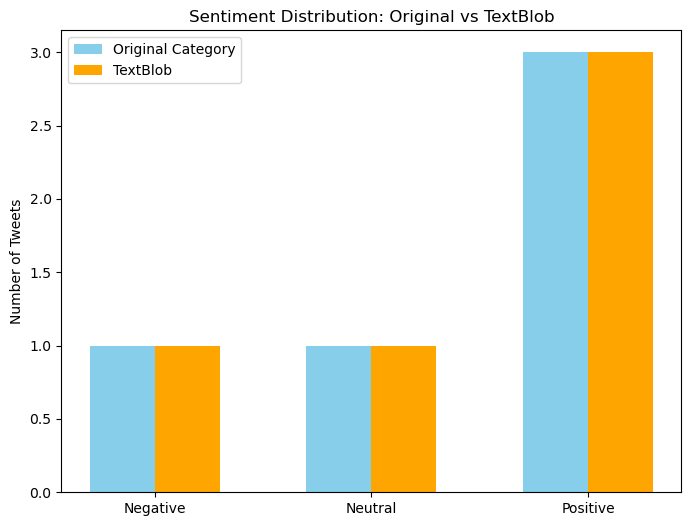

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values for both original category and TextBlob
original_counts = df['category'].value_counts().sort_index()
textblob_counts = df['textblob_cat'].value_counts().sort_index()

# --- Plotting the comparison ---
labels = ['Negative', 'Neutral', 'Positive']
x = [0, 1, 2]  # For positioning bars

fig, ax = plt.subplots(figsize=(8,6))

# Original category
ax.bar([i-0.15 for i in x], original_counts, width=0.3, label='Original Category', color='skyblue')

# TextBlob
ax.bar([i+0.15 for i in x], textblob_counts, width=0.3, label='TextBlob', color='orange')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Distribution: Original vs TextBlob')
ax.legend()
plt.show()

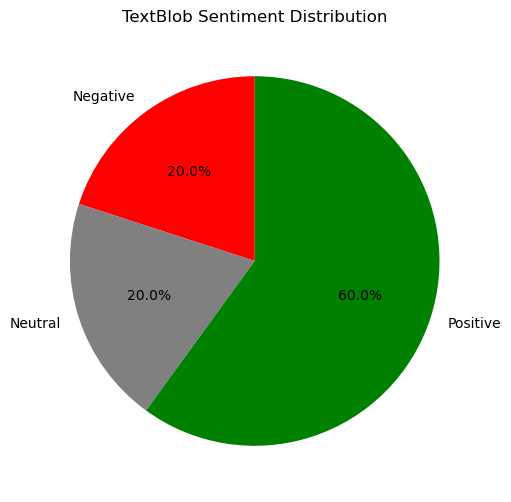

In [14]:
# Pie chart for TextBlob predictions
textblob_counts = df['textblob_cat'].value_counts().sort_index()
labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6,6))
plt.pie(textblob_counts, labels=labels, autopct='%1.1f%%', colors=['red','gray','green'], startangle=90)
plt.title('TextBlob Sentiment Distribution')
plt.show()

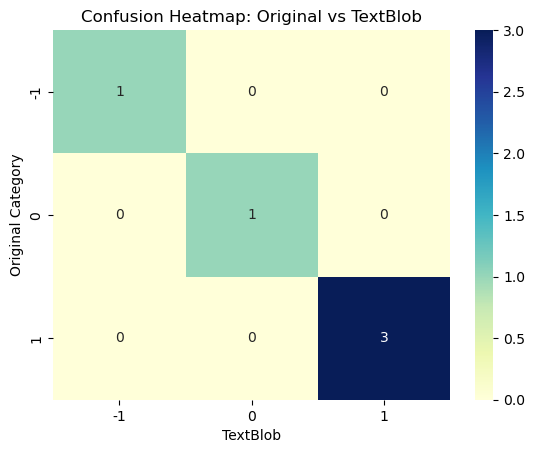

In [15]:
conf_matrix = pd.crosstab(df['category'], df['textblob_cat'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('TextBlob')
plt.ylabel('Original Category')
plt.title('Confusion Heatmap: Original vs TextBlob')
plt.show()